In [ ]:
# load in eng-bn translation dataset
eng2bn = {}
for line in open('/content/drive/MyDrive/Datasets /machine translation/ben-eng/ben.txt'):
  line = line.rstrip()
  eng, bn, *rest = line.split("\t")
  if eng not in eng2bn:
    eng2bn[eng] = []
  eng2bn[eng].append(bn)

In [ ]:
eng2bn

{'Go.': ['যাও।', 'যান।', 'যা।'],
 'Run!': ['পালাও!', 'পালান!'],
 'Who?': ['কে?'],
 'Wow!': ['বাহ!'],
 'Fire!': ['আগুন!'],
 'Help!': ['বাঁচাও!', 'বাঁচান!'],
 'Jump.': ['ঝাঁপ দাও।'],
 'Stop!': ['থামুন!', 'থামো!', 'থাম!'],
 'Hello!': ['নমস্কার!', 'হ্যালো!'],
 'I see.': ['বুঝলাম।'],
 'I try.': ['আমি চেষ্টা করি।'],
 'Smile.': ['একটু হাসুন।', 'একটু হাসো।'],
 'Attack!': ['আক্রমণ!'],
 'Get up.': ['ওঠো।', 'উঠুন।'],
 'Got it!': ['বুঝে গেছি!', 'ধরেছি!'],
 'Got it?': ['বুঝেছো?', 'বুঝেছেন?', 'বুঝেছিস?'],
 'He ran.': ['ও দৌড়ালো।'],
 'I know.': ['আমি জানি।', 'আমার জানা আছে।'],
 'I lost.': ['আমি হেরে গেছি।'],
 "I'm 19.": ['আমার ১৯ বছর বয়স।'],
 "I'm OK.": ['আমি ঠিক আছি।'],
 'Listen.': ['শোন।', 'শুনুন।'],
 'No way!': ['কোন মতেই না!'],
 'Really?': ['সত্যি?', 'তাই নাক?'],
 'Thanks!': ['ধন্যবাদ!'],
 'Thanks.': ['ধন্যবাদ।'],
 'Try it.': ['চেখে দেখুন।', 'চেখে দেখো।'],
 'We won.': ['আমরা জিতে গেছে।'],
 'Why me?': ['আমিই কেন?'],
 'Ask Tom.': ['টমকে জিজ্ঞাসা করো।',
  'টমকে জিজ্ঞাসা করুন।',
  'টমকে জিজ্ঞাসা কর

In [ ]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

In [ ]:
# import RegexpTokenizer since bleu_score function works on tokens rather than raw text
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')   # removes punctuation

In [ ]:
# tokenizer.tokenize('এটা বেশ চমৎকার।'.lower())

In [ ]:
tokens = tokenizer.tokenize('এটা বেশ চমৎকার।'.lower())
sentence_bleu([tokens], tokens)

1.0

In [ ]:
sentence_bleu([['hi']], ['hi'])

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

1.821831989445342e-231

In [ ]:
smoother = SmoothingFunction()
sentence_bleu(['hi'], 'hi', smoothing_function=smoother.method4)

0.2213885886251307

In [ ]:
sentence_bleu(['hi there'.split()], 'hi there'.split())

1.491668146240062e-154

In [ ]:
sentence_bleu(['hi there friend'.split()], 'hi there friend'.split())

1.2213386697554703e-77

In [ ]:
sentence_bleu([[1,2,3,4]], [1,2,3,4])

1.0

In [ ]:
# pre-tokenize targets for later use
eng2bn_tokens = {}
for eng, bn_list in eng2bn.items():
  bn_list_tokens = []
  for text in bn_list:
    tokens = tokenizer.tokenize(text.lower())
    bn_list_tokens.append(tokens)
  eng2bn_tokens[eng] = bn_list_tokens

In [ ]:
!pip install transformers sentencepiece transformers[sentencepiece]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.9 MB/s eta 0:00:00


In [ ]:
from transformers import pipeline
translator = pipeline("translation", model="shhossain/opus-mt-en-to-bn", device=0)

config.json:   0%|          | 0.00/1.41k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/303M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/288 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/282 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/969k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.05M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/74.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [ ]:
translator("Why don't scientists trust atoms?")

[{'translation_text': 'কেন বিজ্ঞানীরা পরমাণু বিশ্বাস করে না?'}]

In [ ]:
eng_phrases = list(eng2bn.keys())
len(eng_phrases)

4971

In [ ]:
eng_phrases_subset = eng_phrases[2000:3000]

In [ ]:
eng_phrases_subset[:5]

['I usually eat outside.',
 'I want to sing a song.',
 'I want to visit Korea.',
 'I was born in October.',
 'I was in the hospital.']

In [ ]:
translations = translator(eng_phrases_subset)

In [ ]:
translations[0]

{'translation_text': 'আমি সাধারণত বাইরে খাই।'}

In [ ]:
scores = []
for eng, pred in zip(eng_phrases_subset, translations):
  matches = eng2bn_tokens[eng]
  # tokenize translation
  bn_pred = tokenizer.tokenize(pred['translation_text'].lower())
  score = sentence_bleu(matches, bn_pred)
  scores.append(score)

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

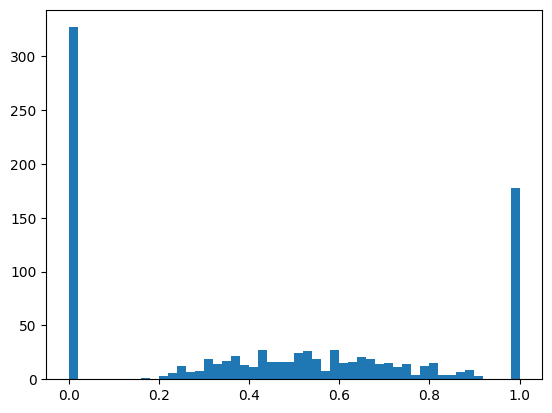

In [ ]:
import matplotlib.pyplot as plt
plt.hist(scores, bins=50);

In [ ]:
import numpy as np
np.mean(scores)

0.44521115744501855

In [ ]:
np.random.seed(1)

In [ ]:
def print_random_translation():
  i = np.random.choice(len(eng_phrases_subset))
  eng = eng_phrases_subset[i]
  print("EN: ", eng)

  translation = translations[i]['translation_text']
  print("BN Translation: ", translation)

  matches = eng2bn[eng]
  print("Matches: ", matches)

In [ ]:
print_random_translation()

EN:  I was born on June 4, 1974.
BN Translation:  আমি ১৯৭৪ সালের ৪ জুন জন্মগ্রহণ করি।
Matches:  ['আমি ৪ঠা জুন, ১৯৭৪ এ জন্মগ্রহণ করেছিলাম।']
